# Section 1: Setup and Data Loading

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
# Load data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [13]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


Dataset Shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


# Section 2: Exploratory Data Analysis (EDA)

In [14]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


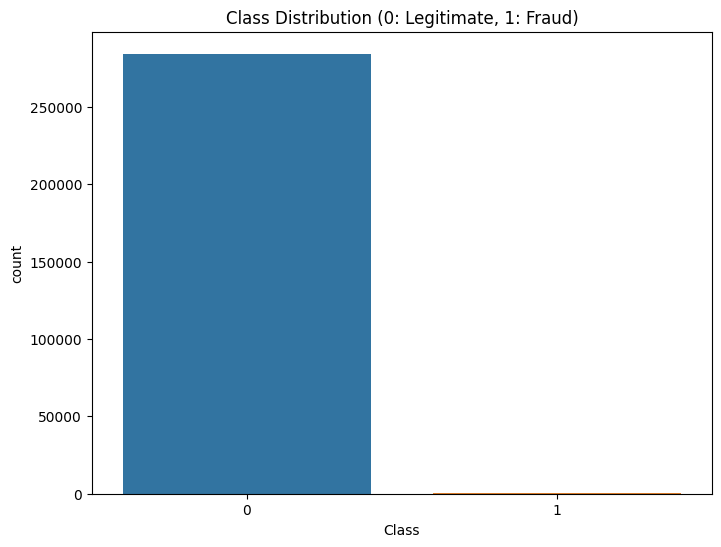

In [15]:
# Check class distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

In [16]:
# Display class counts
class_counts = df['Class'].value_counts()
print("Class Distribution:\n", class_counts)
print("\nPercentage of Fraudulent Transactions:", (class_counts[1]/class_counts.sum())*100)


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1727485630620034


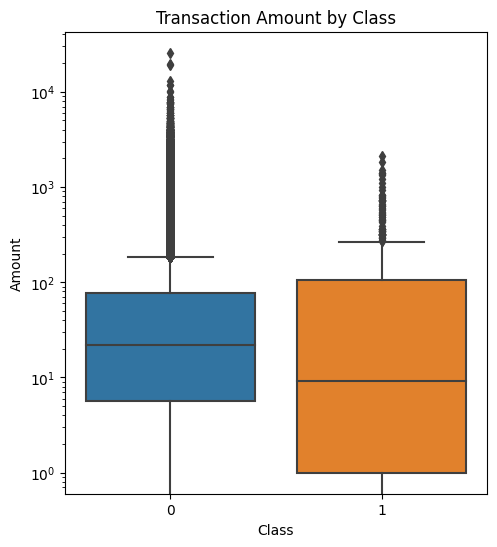

In [17]:
# Analyze transaction amounts
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.yscale('log')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


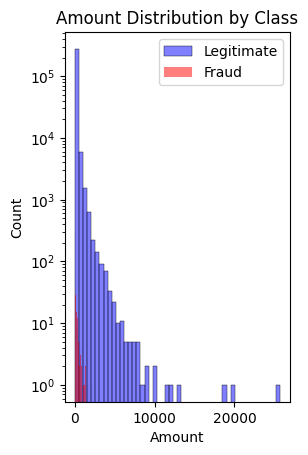

In [18]:
plt.subplot(1,2,2)
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='blue', label='Legitimate', alpha=0.5)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.5)
plt.title('Amount Distribution by Class')
plt.yscale('log')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Transaction Time by Class')

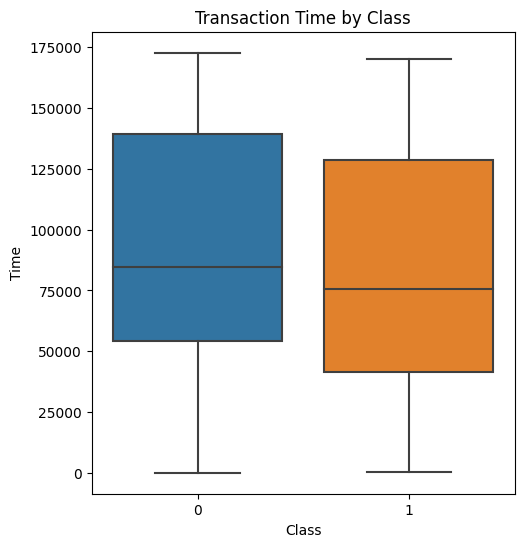

In [19]:
# Time analysis
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Transaction Time by Class')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


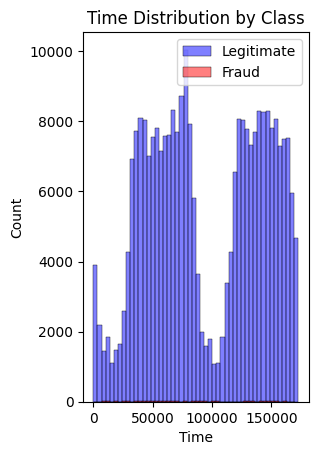

In [20]:
plt.subplot(1,2,2)
sns.histplot(df[df['Class']==0]['Time'], bins=50, color='blue', label='Legitimate', alpha=0.5)
sns.histplot(df[df['Class']==1]['Time'], bins=50, color='red', label='Fraud', alpha=0.5)
plt.title('Time Distribution by Class')
plt.legend()
plt.show()

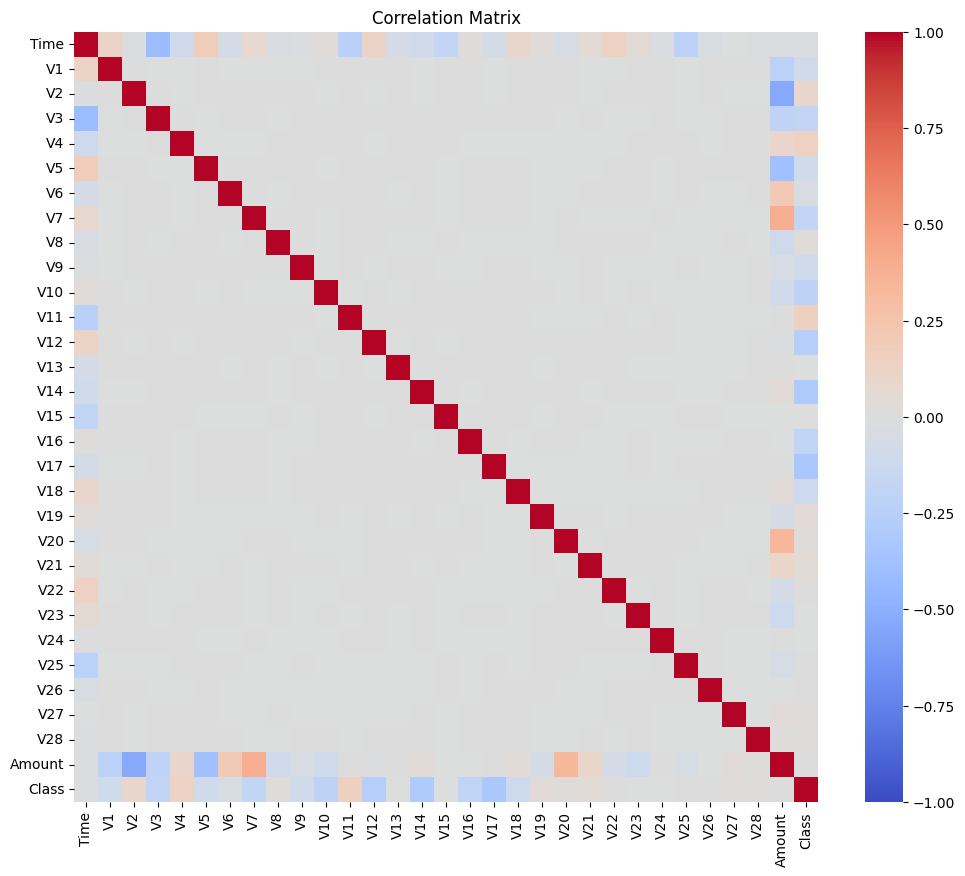

In [21]:
# Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Section 3: Data Preprocessing

In [26]:
# Scale 'Time' and 'Amount' features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [27]:
# Drop original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [28]:
# Move 'Class' column to the end
class_column = df.pop('Class')
df['Class'] = class_column

In [29]:
# Split into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:\n", y_train.value_counts())
print("\nClass distribution in test set:\n", y_test.value_counts())

Training set shape: (227845, 30)
Test set shape: (56962, 30)

Class distribution in training set:
 Class
0    227451
1       394
Name: count, dtype: int64

Class distribution in test set:
 Class
0    56864
1       98
Name: count, dtype: int64


# Section 4: Handling Class Imbalance

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define resampling strategy
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [40]:
# Create pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [48]:
# Resample the training data
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

In [49]:
print("After resampling:")
print("Training set shape:", X_train_res.shape)
print("Class distribution:\n", pd.Series(y_train_res).value_counts())

After resampling:
Training set shape: (68235, 30)
Class distribution:
 Class
0    45490
1    22745
Name: count, dtype: int64


# Section 5: Anomaly Detection Models# 

In [50]:
# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train_res)

IsolationForest(random_state=42)

In [51]:
# Predictions
iso_pred = iso_forest.predict(X_test)
iso_pred = [1 if x == -1 else 0 for x in iso_pred]  # Convert to binary (0: normal, 1: anomaly)

In [52]:
# Evaluation
print("Isolation Forest Results:")
print(classification_report(y_test, iso_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, iso_pred))

Isolation Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.05      0.28      0.08        98

    accuracy                           0.99     56962
   macro avg       0.52      0.63      0.54     56962
weighted avg       1.00      0.99      0.99     56962


Confusion Matrix:
[[56315   549]
 [   71    27]]


In [53]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
lof_pred = lof.fit_predict(X_test)
lof_pred = [1 if x == -1 else 0 for x in lof_pred]  # Convert to binary

In [54]:
# Evaluation
print("\nLocal Outlier Factor Results:")
print(classification_report(y_test, lof_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lof_pred))


Local Outlier Factor Results:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.00      0.10      0.01        98

    accuracy                           0.95     56962
   macro avg       0.50      0.53      0.49     56962
weighted avg       1.00      0.95      0.98     56962


Confusion Matrix:
[[54368  2496]
 [   88    10]]


# Section 6: XGBoost Classifier

In [56]:
# Initialize and train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=100  # Adjust for class imbalance
)

xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
# Predictions
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)[:,1]

In [58]:
# Evaluation
print("XGBoost Classifier Results:")
print(classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      0.95      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.92      0.48     56962
weighted avg       1.00      0.89      0.94     56962


Confusion Matrix:
[[50354  6510]
 [    5    93]]


In [59]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba)
roc_auc = auc(fpr, tpr)

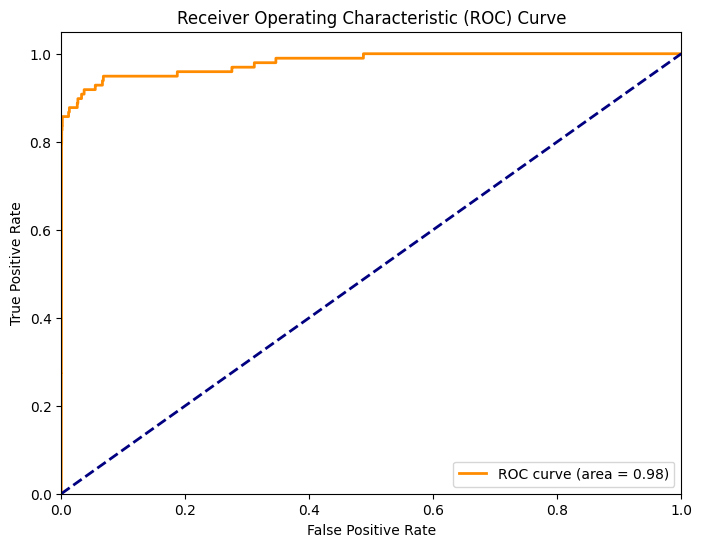

In [60]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Section 7: Model Saving and Preparation for Flask

In [61]:
# Save the trained model and scaler
model_data = {
    'model': xgb,
    'scaler': scaler
}


In [67]:
with open('/kaggle/working/fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

In [74]:
# Create a sample function for Flask
def predict_fraud(transaction_data):
    """
    Sample function for Flask app
    transaction_data should be a dictionary with all V1-V28 features, Time, and Amount
    """
    # Load the model
    with open('fraud_detection_model.pkl', 'rb') as f:
        model_data = pickle.load(f)
    
    model = model_data['model']
    scaler = model_data['scaler']
    
    # Convert to DataFrame
    input_df = pd.DataFrame([transaction_data])
    
    # Scale Time and Amount
    input_df['scaled_amount'] = scaler.transform(input_df['Amount'].values.reshape(-1,1))
    input_df['scaled_time'] = scaler.transform(input_df['Time'].values.reshape(-1,1))
    
    # Drop original columns
    input_df.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # Reorder columns to match training data
    cols = [f'V{i}' for i in range(1,29)] + ['scaled_amount', 'scaled_time']
    input_df = input_df[cols]
    
    # Make prediction
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[0,1]
    
    return {
        'prediction': int(prediction[0]),
        'probability': float(probability),
        'is_fraud': bool(prediction[0])
    }


In [75]:
# Test the function
sample_transaction = {f'V{i}': 0 for i in range(1,29)}
sample_transaction.update({'Time': 0, 'Amount': 0})
print("Sample Prediction:", predict_fraud(sample_transaction))

Sample Prediction: {'prediction': 1, 'probability': 0.5139102935791016, 'is_fraud': True}
